In [1]:
import OpenEphys
from matplotlib import pyplot as plt
import numpy as np
import os


In [2]:
# import matplotlib as mpl
# mpl.rcParams['xtick.color'] = 'gray'
# mpl.rcParams['ytick.color'] = 'gray'
# mpl.rcParams['axes.labelcolor'] = 'gray'

In [3]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [4]:
# f_name = "/mnt/data/temp/kaveh/openEphys_data/2018-10-25_17-17-07/100_CH1.continuous"
# f_name = "/mnt/data/temp/kaveh/openEphys_data/2018-10-25_17-18-34/100_CH1.continuous"
# f_name = "/mnt/data/temp/kaveh/openEphys_data/2018-10-25_17-41-20/100_CH1.continuous"
# f_name = "/mnt/data/temp/kaveh/openEphys_data/2018-10-25_17-43-54/100_CH1.continuous"

# f_name_1 = '/mnt/data/temp/kaveh/openEphys_data/2019-02-02/2019-02-02_16-00-36/109_CH1.continuous'
# f_name_4 = '/mnt/data/temp/kaveh/openEphys_data/2019-02-02/2019-02-02_16-00-36/109_CH4.continuous'

f_name_1 = '/mnt/data/temp/kaveh/openEphys_data/2019-02-02/2019-02-02_16-00-36/109_CH1.continuous'
f_name_4 = '/mnt/data/temp/kaveh/openEphys_data/2019-02-02/2019-02-02_16-00-36/109_CH4.continuous'


In [5]:
source_path = '/mnt/data/temp/kaveh/openEphys_data/2019-02-02/2019-02-02_16-00-36/'
f_names = []
for root, dirnames, filenames in os.walk(source_path):
    for filename in filenames:
        if filename.endswith('continuous'):
            f_names = f_names + [os.path.join(root, filename)]
            


In [6]:

all_channels = []
all_fs = []
for fn in f_names:
    file_content = OpenEphys.load(fn)
    all_channels = all_channels + [file_content['data']]
    all_fs = all_fs + [float(file_content['header']['sampleRate'])]
all_channels = np.array(all_channels)
all_fs = np.array(all_fs)


Loading continuous data...
Loading continuous data...
Loading continuous data...
Loading continuous data...


In [7]:
def common_avg_ref(data, refrence, affected):
    signal_average = np.mean(data[refrence, :], axis = 0)
    data[affected,:] = data[affected,:] - signal_average

In [8]:
# signal_average = np.mean(all_channels[np.arange(0,4), :], axis = 0)
# all_channels[np.arange(0,4),:]=  all_channels[np.arange(0,4),:] - signal_average

In [9]:
# np.arange(0,3)

<IPython.core.display.Javascript object>


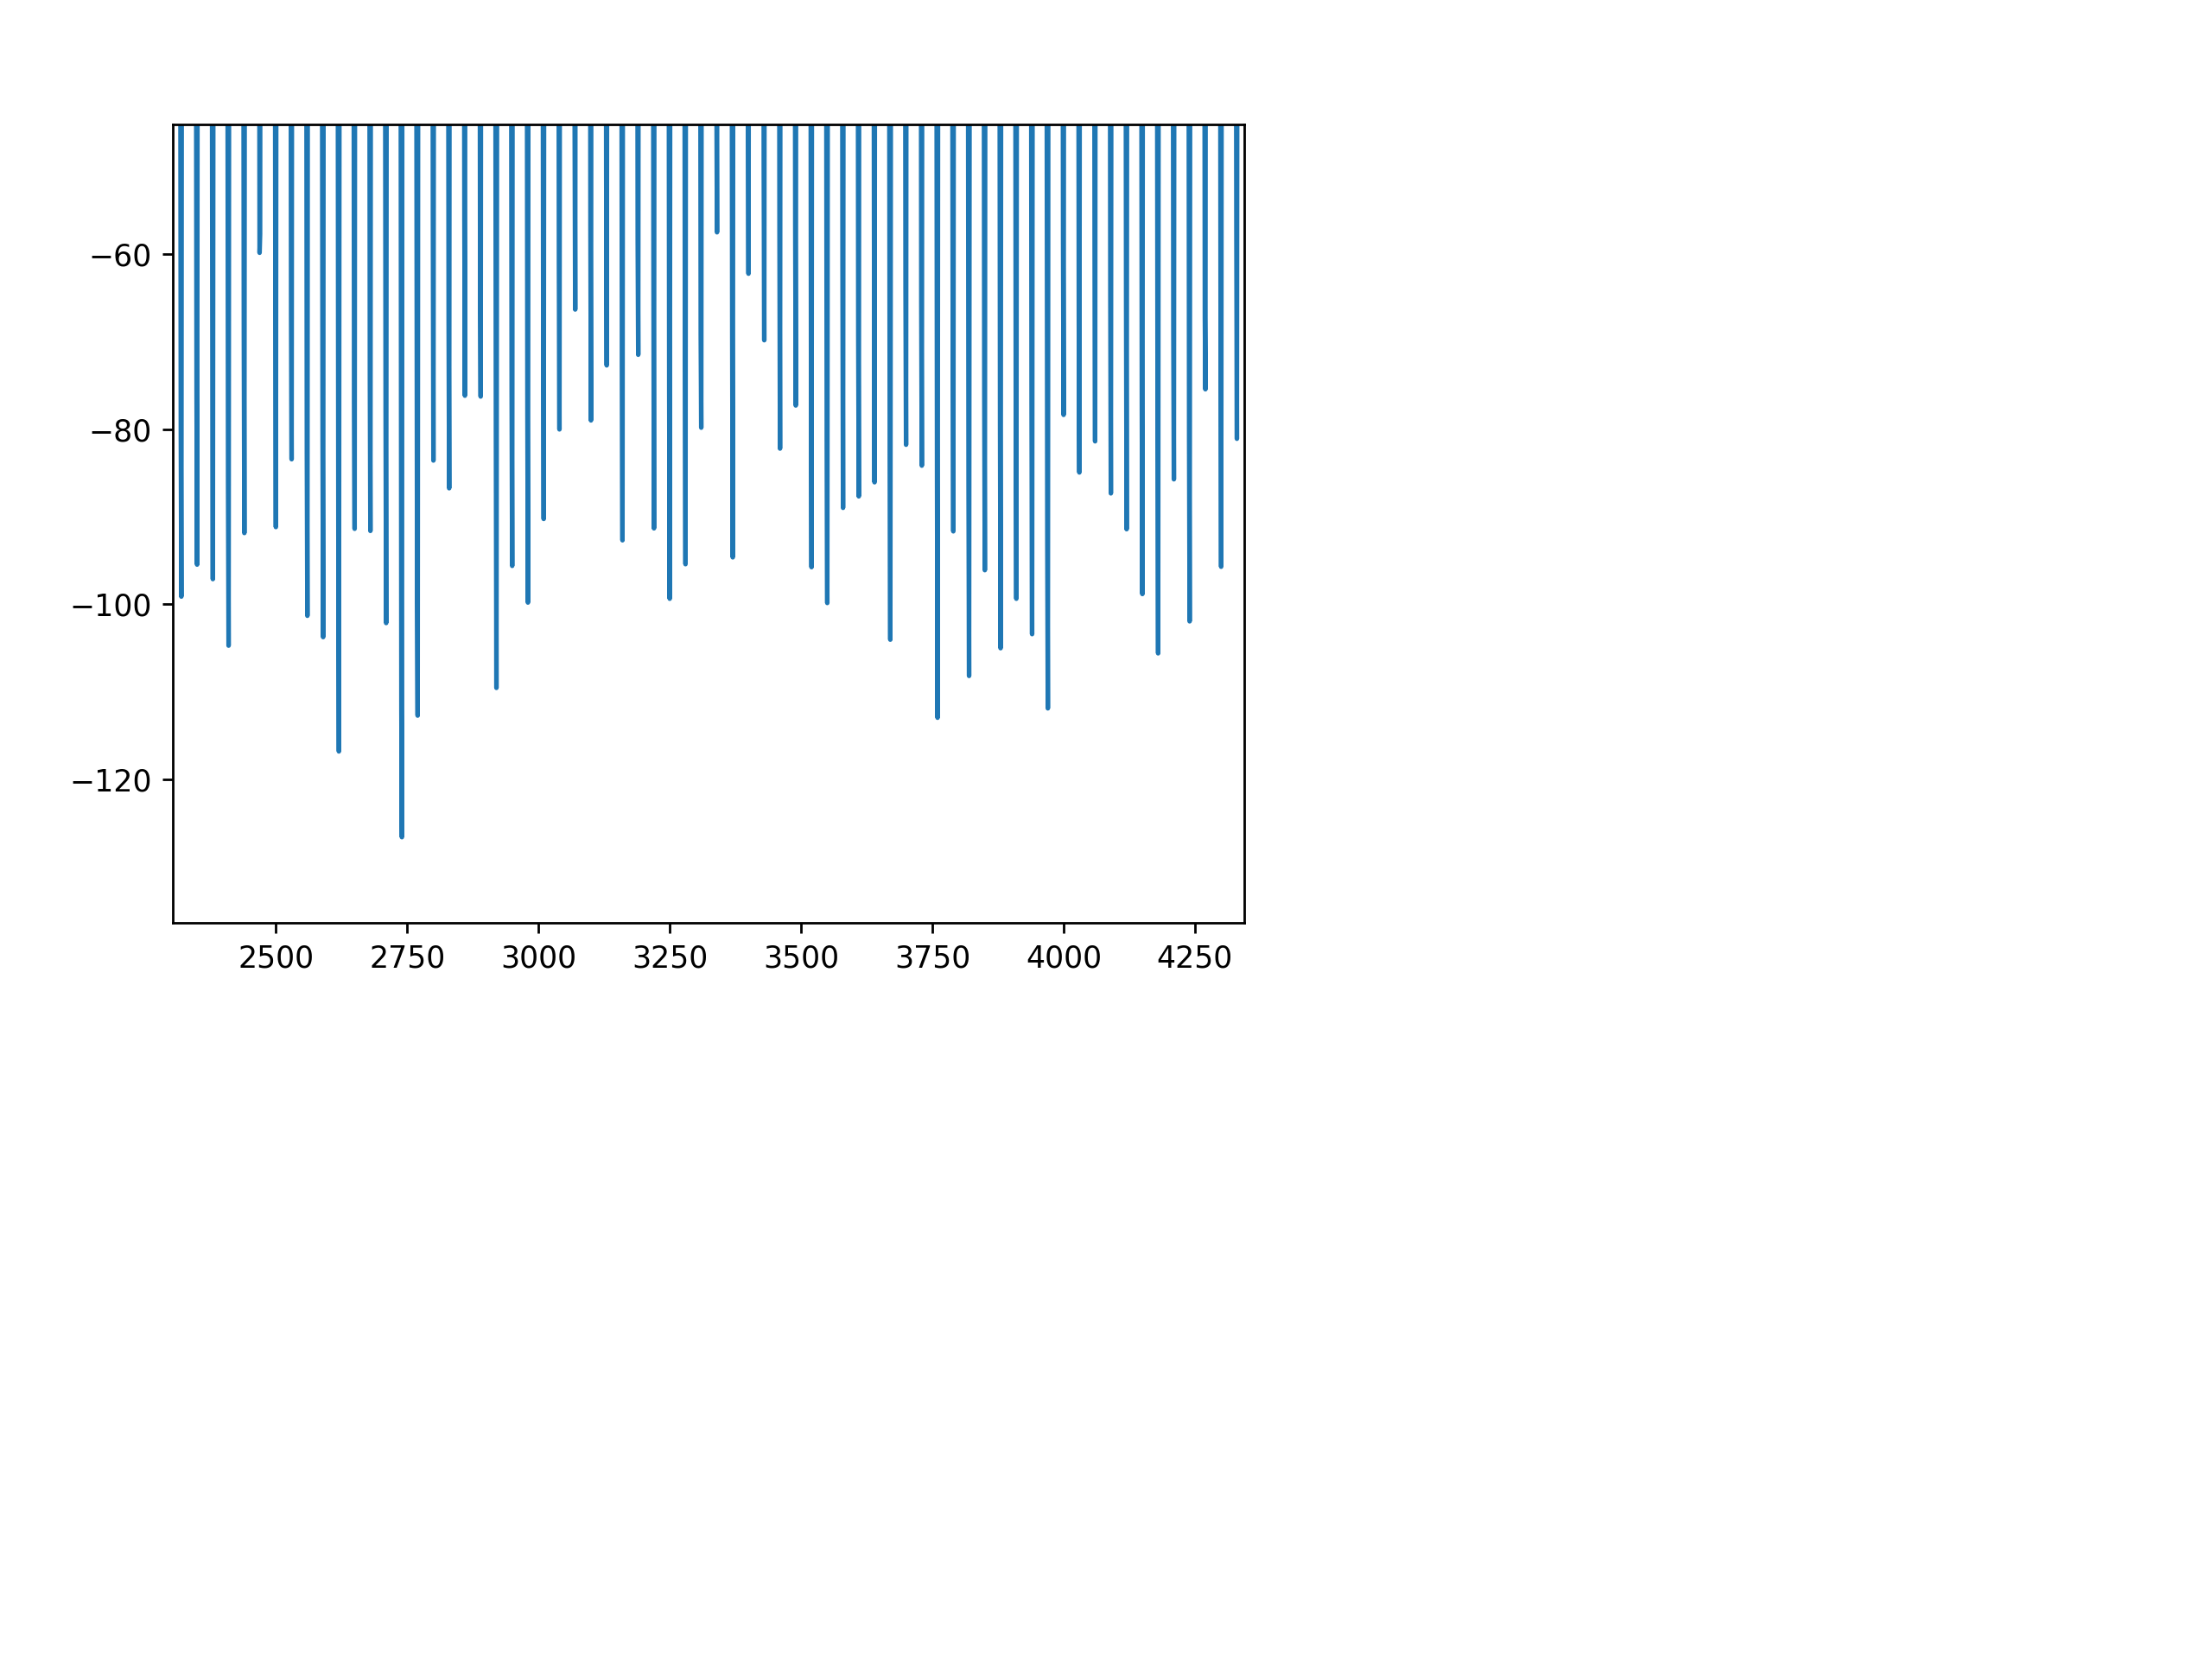

In [11]:
common_avg_ref(all_channels, np.arange(0,4), np.arange(0,4))
plt.figure()
plt.plot(all_channels[0, 0:20000].T)
# plt.plot(signal_average[0:1000], 'k')

In [ ]:
ch_0 = np.squeeze(file_content_0['data'])
ch_3 = np.squeeze(file_content_3['data'])

In [ ]:
ch_0 = butter_bandpass_filter(ch_0, 300, 3000, Fs, order=2)
ch_3 = butter_bandpass_filter(ch_3, 300, 3000, Fs, order=2)

In [ ]:
ch_0 = ch_0 - np.mean((ch_0, ch_3), axis=0)

In [ ]:
plt.figure(figsize=(20,5))
dt = 1.0/Fs

plt.plot(np.arange(0, ch_0.size)*dt, ch_0)
plt.xlabel('Time (s)')


In [ ]:
def fft_spectrum(data, Fs):
    """
    Returns spectrum as Power/Frequency (dB/Hz)
    """
    yf = scipy.fftpack.fft(data)
    N = data.size
    xf = np.linspace(0.0, 1.0 / (2.0 * dt), N/2)
    power_spectrum = 2.0/(Fs*N) * (np.abs(yf[:N//2])**2) 
    return xf, 10.0*np.log10(power_spectrum)


xf, yf = fft_spectrum(signal, Fs)

plt.figure(figsize=(10,3))
plt.plot(xf, yf)
plt.title('power spectrum')
plt.xlabel('Frequency (Hz)');
plt.ylabel('Power/Frequency (dB/Hz)');
plt.ylim((-80,60))


In [ ]:
signal = np.squeeze(file_content['data'])

Fs = float(file_content['header']['sampleRate'])
signal_filtered = butter_bandpass_filter(signal, 300, 3000, Fs, order=3)
dt = 1.0/Fs
plt.figure(figsize=(20,5))
plt.plot(np.arange(0, signal_filtered.size)*dt, signal_filtered)
plt.xlabel('Time (s)')
# ax = plt.gca()
# ax.tick_params(axis='x', colors='gray')
# ax.tick_params(axis='y', colors='gray')
# ax.xaxis.label.set_color('gray')


In [ ]:
import scipy.signal
import scipy.fftpack


yf = scipy.fftpack.fft(signal)
N = signal.size
xf = np.linspace(0.0, 1.0 / (2.0 * dt), N/2)
power_spectrum = 2.0/N * np.abs(yf[:N//2])
plt.figure()
plt.plot(xf, power_spectrum)


# filtered = notch_all_harmonics(signal, 16.0, Fs)
# filtered = notch_all_harmonics(filtered, 100.0, Fs)
# filtered = notch_all_harmonics(filtered, 190.4, Fs)
# filtered = notch_all_harmonics(filtered, 465.4, Fs)
# filtered = notch_all_harmonics(filtered, 146.9, Fs)
# filtered = notch_all_harmonics(filtered, 153.13, Fs)
# filtered = notch_all_harmonics(filtered, 246.9, Fs)
# filtered = notch_all_harmonics(filtered, 253.13, Fs)


# filtered = butter_lowpass_filter(filtered, 1500.0, Fs, 4)

# yf = scipy.fftpack.fft(filtered)
# N = filtered.size
# xf = np.linspace(0.0, 1.0 / (2.0 * dt), N/2)
# power_spectrum = 2.0/N * np.abs(yf[:N//2])
# plt.figure()
# plt.plot(xf, power_spectrum)

# # Number of samplepoints
# N = signal.size
# # sample spacing

# yf = scipy.fftpack.fft(signal)
# xf = np.linspace(0.0, 1.0/(2.0*dt), N/2)

# fig, ax = plt.subplots()
# ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
# plt.show()

In [ ]:
plt.figure()
plt.plot(np.arange(0, filtered.size)*dt, filtered)
plt.xlabel('Time(s)')


In [ ]:
import scipy.signal
import scipy.fftpack
def notch_all_harmonics(signal, base_freq, sampling_rate):
    """
    Stoppass filter at the base_freq and all of its harmonics
    """
    if base_freq > sampling_rate/2.0:
        print('Invalid frequency to notch')
        return
    curr_freq = base_freq
    while curr_freq < sampling_rate/2.0:
        b, a = scipy.signal.iirnotch(curr_freq/(sampling_rate/2.0), 30)
        signal = scipy.signal.lfilter(b, a, signal)
        curr_freq = curr_freq + base_freq
        
    return signal
        

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='low', analog=False)
    y = scipy.signal.lfilter(b, a, data)
    return y


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    y = scipy.signal.lfilter(b, a, data)
    return y


In [ ]:
[(param, value) for param, value in plt.rcParams.items() if 'label' in param]